In the filter.py file there is a code which we used to extract data for Swiss products from cluster. To do that we used list of brands which is located in brands_lists folder (file we used is brands_swiss_original_list.json). 
Similarly, we extracted data for German, Italian, French and USA products, by using brands listed in files with appropriate names.

In [1]:
import os
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import time

# Data improting and cleaning

 In the next few cells we import data from json files into DataFrames. We did that for Switzerlan as well as for other countries.  

In [2]:
with open("res.json") as file:
    data = pd.read_json(file)
data.shape

(213873, 17)

Every row of a DataFrame represents one revies. In the next cell we can observe which information considering one review we have.

In [3]:
data.loc[0]

asin                                                     B0009YJ238
brand                                                        Nestle
categories        [[Pet Supplies, Dogs, Treats, Cookies, Biscuit...
description       Busy Bone, 7 OZ, Small/Medium Dog Treat, Twist...
helpful                                                      [0, 0]
imUrl             http://ecx.images-amazon.com/images/I/31ToYepJ...
overall                                                           5
price                                                          3.49
related                                                         NaN
reviewText        I adore my six-month-old dog, Midge.  She's ev...
reviewTime                                              01 22, 2007
reviewerID                                           A3MTXMDJ7JQSFO
reviewerName                                            A. Ruminski
salesRank                                  {'Pet Supplies': 487454}
summary                                     Busy

In [4]:
#with open("res_usa.json") as file:
    #data_US = pd.read_json(file)
#data.shape
#print("check")

In [5]:
with open("res_france.json") as file:
    data_france = pd.read_json(file)
data_france.shape

(15226, 17)

In [6]:
with open("res_italy.json") as file:
    data_italy = pd.read_json(file)
data_italy.shape

(30254, 17)

In [7]:
with open("res_germany.json") as file:
    data_germany = pd.read_json(file)
data_germany

,asin,brand,categories,description,helpful,imUrl,overall,price,related,reviewText,reviewTime,reviewerID,reviewerName,salesRank,summary,title,unixReviewTime
0,B00005O66O,WMF,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",This narrow lifter is just one of the high-qua...,"[0, 0]",http://ecx.images-amazon.com/images/I/315H1HXT...,5,19.23,"{'also_viewed': ['B00005O66M', 'B00005O66T', '...",All the WMF articles I have bought are very st...,"11 26, 2011",A1QH07ZORJLW1A,Marlene,{'Kitchen & Dining': 109323},Good kitchen tool,Profi Plus 11-Inch Stainless Steel Spatula,1322265600
1,B00005O66O,WMF,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",This narrow lifter is just one of the high-qua...,"[0, 0]",http://ecx.images-amazon.com/images/I/315H1HXT...,5,19.23,"{'also_viewed': ['B00005O66M', 'B00005O66T', '...",My straight spatula was so old (and battered) ...,"03 13, 2010",A3QJQQZTKFV7BJ,"Sandy ""WR Gma""",{'Kitchen & Dining': 109323},Perfect kitchen accessory,Profi Plus 11-Inch Stainless Steel Spatula,1268438400
2,B00005O66O,WMF,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",This narrow lifter is just one of the high-qua...,"[4, 4]",http://ecx.images-amazon.com/images/I/315H1HXT...,5,19.23,"{'also_viewed': ['B00005O66M', 'B00005O66T', '...",I purchased this spatula six years ago when I ...,"12 27, 2007",ADNPUV2B9CLEQ,C. Bullman,{'Kitchen & Dining': 109323},WMF: Quality products,Profi Plus 11-Inch Stainless Steel Spatula,1198713600
3,B00005O66O,WMF,"[[Home & Kitchen, Kitchen & Dining, Kitchen Ut...",This narrow lifter is just one of the high-qua...,"[0, 0]",http://ecx.images-amazon.com/images/I/315H1HXT...,5,19.23,"{'also_viewed': ['B00005O66M', 'B00005O66T', '...","This spatula is a nice heavy, durable weight &...","10 20, 2013",AI02N0QYMMFR5,Stacy Coukoulis Julien,{'Kitchen & Dining': 109323},Nice SS spatula,Profi Plus 11-Inch Stainless Steel Spatula,1382227200
4,B0000CFPKC,Melitta,"[[Home & Kitchen, Kitchen & Dining, Dining & E...",62955 Features: -Set of 100 coffee filters.-Te...,"[0, 1]",http://ecx.images-amazon.com/images/I/41PbskA3...,5,3.31,NaN,I grabbed these on a whim at the store one day...,"07 5, 2010",A1Z54EM24Y40LL,csm,{'Home &amp; Kitchen': 889762},The best I've used!,Basket Coffee Filter in White,1278288000
5,B0000CFPKC,Melitta,"[[Home & Kitchen, Kitchen & Dining, Dining & E...",62955 Features: -Set of 100 coffee filters.-Te...,"[1, 1]",http://ecx.images-amazon.com/images/I/41PbskA3...,5,3.31,NaN,My department decided to add freshly brewed co...,"01 7, 2012",A24J4WQAG5EH62,K. J. Simon,{'Home &amp; Kitchen': 889762},Quality You'd Expect from Coffee Brewing Experts,Basket Coffee Filter in White,1325894400
6,B0000Y689S,Henckels,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...",Sharpen your knives with ease with this manual...,"[0, 0]",http://ecx.images-amazon.com/images/I/31K6-Pe9...,4,39.99,"{'also_viewed': ['B00004RFM6', 'B00004RFMA', '...",this is a good one. I've bought many less expe...,"05 28, 2014",AS9Z9RI89DJ3O,Syl,{'Kitchen & Dining': 125355},great product,Zwilling J.A. Henckels Professional S Steel Sh...,1401235200
7,B0000Y689S,Henckels,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...",Sharpen your knives with ease with this manual...,"[2, 5]",http://ecx.images-amazon.com/images/I/31K6-Pe9...,4,39.99,"{'also_viewed': ['B00004RFM6', 'B00004RFMA', '...",This Sharpening Steel is of good quality at a ...,"01 7, 2009",A1ELPNTRPGW2U3,"ronemtz ""I enjoy some historical fiction. Jam...",{'Kitchen & Dining': 125355},Good Sharpening Steel,Zwilling J.A. Henckels Professional S Steel Sh...,1231286400
8,B0000Y689S,Henckels,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...",Sharpen your knives with ease with this manual...,"[5, 5]",http://ecx.images-amazon.com/images/I/31K6-Pe9...,5,39.99,"{'also_viewed': ['B00004RFM6', 'B00004RFMA', '...",I bought this steel along with a Henckels chef...,"08 16, 2007",A29JDHVXHY6YNF,Sin Patria pero sin Amo,{'Kitchen & Dining': 125355},A classic,Zwilling J.A. Henckels Professi

By observing products withing each brand, we can easily spot that it can happen that name of a brand, eg. "Omega" represents more than one company (and in case of "Omega" almost 10 companies). For each brand we delete categories which are not connected with products which company from Switzerland produces. E.g. Swiss company "Omega" makes mainly watches or similar accessories. Therefore, product in category ['Home & Kitchen','Kitchen & Dining', 'Small Appliances', 'Juicers', 'Masticating Juicers'] is very likely not swiss product. We checked manualy some products and actual brands of such categories, to justify our assumptions.

In [8]:
data.groupby("brand").get_group("Omega")["categories"][14][0]

['Home & Kitchen',
 'Kitchen & Dining',
 'Small Appliances',
 'Juicers',
 'Masticating Juicers']

In [9]:
data=data[data['brand']!="ABB"]
data=data[data['brand']!="Callebaut"]
data=data[data['brand']!="ABB"]
data=data[data['brand']!="STMicroelectronics"]
data=data[(data['brand']!="IWC")|((data['brand']=="IWC") & \
                    ((data["categories"]!="AutomotivePaint, Body & TrimBodyDoors")& \
                                (data["categories"]!='AutomotiveTires & WheelsAccessoriesCenter Caps')& \
                                    (data["categories"]!='AutomotiveTires & WheelsHubcaps & CoversHubcaps')))]
data=data[(data['brand']!="Swatch")|((data['brand']=="Swatch") & \
                    ((data["categories"]!="Arts, Crafts & SewingFabric")& \
                                    (data["categories"]!='Arts, Crafts & SewingNeedleworkCross-StitchCounted Kits')))]
data=data[(data['brand']!="Sigg")|((data['brand']=="Sigg") & \
                                    (data["categories"]!='Office ProductsOffice & School SuppliesForms, Recordkeeping & Money HandlingMoney & Rent Receipts'))]
data=data[(data['brand']!="PB Swiss")|((data['brand']=="PB Swiss") & \
                    ((data["categories"]!="Clothing, Shoes & JewelryNovelty, Costumes & MoreNoveltyJewelryBracelets")& \
                                (data["categories"]!='Office ProductsOffice & School SuppliesCalendars, Planners & Personal OrganizersWall Calendars')& \
                                    (data["categories"]!='Sports & OutdoorsAccessoriesWristbands')))]
data=data[(data['brand']!="Omega")|((data['brand']=="Omega") & \
                    ((data["categories"]=="Clothing, Shoes & JewelryGifts")| \
                    (data["categories"]=='Clothing, Shoes & JewelryJewelry: International Shipping Available')| \
                    (data["categories"]=='Clothing, Shoes & JewelryLuxury Watches')| \
                     (data["categories"]=='Clothing, Shoes & JewelryNew Arrivals')| \
                     (data["categories"]=='Clothing, Shoes & JewelryOmega Watches')| \
                     (data["categories"]=='Sports & OutdoorsAccessoriesSport Watches')))]

Here we can see how our DataFrame looks for first few reviews.

In [10]:
data.head(5)

,asin,brand,categories,description,helpful,imUrl,overall,price,related,reviewText,reviewTime,reviewerID,reviewerName,salesRank,summary,title,unixReviewTime
0,B0009YJ238,Nestle,"[[Pet Supplies, Dogs, Treats, Cookies, Biscuit...","Busy Bone, 7 OZ, Small/Medium Dog Treat, Twist...","[0, 0]",http://ecx.images-amazon.com/images/I/31ToYepJ...,5,3.49,NaN,"I adore my six-month-old dog, Midge. She's ev...","01 22, 2007",A3MTXMDJ7JQSFO,A. Ruminski,{'Pet Supplies': 487454},Busy bone = happy owner,BusyBone MED Dog Treat,1169424000
1,B00126U31C,Swatch,"[[Clothing, Shoes & Jewelry, New Arrivals], [C...",NaN,"[0, 1]",http://ecx.images-amazon.com/images/I/51fwuvsL...,3,72.14,"{'also_viewed': ['B002DQGUI0', 'B000KNE09E', '...","The watch itself is solid, however, the leathe...","12 14, 2012",AYKBRA7MKIPAV,G.Jackson,{'Watches': 95452},Swatch watch,Swatch Men's STYNS421 Wild Roar Brown Dial Watch,1355443200
2,B002HHGF5I,Tissot,"[[Sports & Outdoors, Accessories, Sport Watche...",NaN,"[4, 5]",http://ecx.images-amazon.com/images/I/516lmovC...,5,846.00,"{'also_viewed': ['B0029SJ3ZE', 'B001CBC2I4', '...",incredible watch. super light yet rugged. i ...,"03 7, 2011",A3MBOY1IA8PS85,"M. Klein ""Gras""",{'Watches': 27798},great watch,Tissot Men's T0134204405700 T-Touch Expert Pil...,1299456000
3,B002HHGF5I,Tissot,"[[Sports & Outdoors, Accessories, Sport Watche...",NaN,"[8, 11]",http://ecx.images-amazon.com/images/I/516lmovC...,5,846.00,"{'also_viewed': ['B0029SJ3ZE', 'B001CBC2I4', '...",I have been a watch junkie for some years but ...,"02 27, 2010",A1SE5JXA03WBDT,"Mem Ber ""me""",{'Watches': 27798},the best watch in my collection,Tissot Men's T0134204405700 T-Touch Expert Pil...,1267228800
4,B002HHGF5I,Tissot,"[[Sports & Outdoors, Accessories, Sport Watche...",NaN,"[0, 2]",http://ecx.images-amazon.com/images/I/516lmovC...,5,846.00,"{'also_viewed': ['B0029SJ3ZE', 'B001CBC2I4', '...",just what I wanted when I ordered this watch. ...,"01 7, 2014",A4ACF44TDCIZK,MELANIE DAVID,{'Watches': 27798},Tissot Men's T0134204405700 T-Touch Expert Pil...,Tissot Men's T0134204405700 T-Touch Expert Pil...,1389052800


If we inspect some entries, it can be seen that the category column for some of the rows contains more than one entries. See example below

In [11]:
data['categories'][1]

[['Clothing, Shoes & Jewelry', 'New Arrivals'],
 ['Clothing, Shoes & Jewelry', 'Jewelry: International Shipping Available'],
 ['Clothing, Shoes & Jewelry', 'Fashion Watches'],
 ['Clothing, Shoes & Jewelry', 'Available for International Shipping'],
 ['Clothing, Shoes & Jewelry', 'Swatch Watches'],
 ['Clothing, Shoes & Jewelry', 'Men', 'Watches', 'Wrist Watches']]

We figure out the number of such entries (that we call invalid) in our dataset

In [12]:
data['flag'] = data['categories'].apply(lambda x: False if len(x)>1 else True)
print(data.flag.value_counts())
print('Number of invalid entries: ', data.flag.value_counts()[0] ,'\n',
      'Percentage of total entries that are invalid: ',
      100*data.flag.value_counts()[0] / data.flag.value_counts().sum())

True     199104
False      8288
Name: flag, dtype: int64
Number of invalid entries:  8288 
 Percentage of total entries that are invalid:  3.99629686777


We intend to perform the category-wise analysis of our reviews and since these entries (that are slightly complicated to handle due to multiple values for category attribute) happen to be only 4% of the entire dataset, we drop them. We do that for all other countries as well.

In [13]:
import numpy as np
def delete_more_categories(data):
    data['flag'] = data['categories'].apply(lambda x: False if len(x)>1 else True)
    return data[data['flag']]
data = delete_more_categories(data)
data_france = delete_more_categories(data_france)
data_italy = delete_more_categories(data_italy)
#data_US = delete_more_categories(data_US)
data_germany = delete_more_categories(data_germany)

In [14]:
print(data['categories'][0])

[['Pet Supplies', 'Dogs', 'Treats', 'Cookies, Biscuits & Snacks', 'Snacks']]


Our objective now is to determine a level in the hierarchy of categories where we should stop, so that the different number of categories we get are manageable for analysis and for interpretable results. 

For example the categories attribute for the 154-th instance printed above is a 5 member list -  
['Home & Kitchen', 'Kitchen & Dining', 'Small Appliances', 'Juicers', 'Masticating Juicers']

If we decide to stop at a hierarchy level of 1, we would clip this list to simply ['Home & Kitchen'] or if we stop at the second level we'll end up with ['Home & Kitchen', 'Kitchen & Dining'] for this instance. A good choice of what level to stop at will be guided by the number of unique category attributes we have to deal with for the given level. To begin with, we stop at a level of 2 to realize that we get 103 unique categories which are too much for proper interpretability, hence we go up the level and check for 1.

In [15]:
df_test = data.copy()
df_test['categories_clipped'] = df_test['categories'].apply(lambda x: (x[0][0] + ', ' + x[0][1]) if len(x[0])>2 
                                                            else x[0][0] )
print('Number of unique categories after clipping:', len(df_test.categories_clipped.unique()),
      '\n',df_test.categories_clipped.value_counts())

Number of unique categories after clipping: 97 
 Electronics, Computers & Accessories                      115571
Electronics, Accessories & Supplies                        13397
Home & Kitchen, Kitchen & Dining                           12041
Sports & Outdoors, Outdoor Gear                            11695
Video Games, PC                                             9868
Grocery & Gourmet Food                                      8214
Electronics, Portable Audio & Video                         7233
Cell Phones & Accessories, Accessories                      2753
Tools & Home Improvement, Power & Hand Tools                1449
Office Products, Office Electronics                         1413
Beauty, Skin Care                                           1363
Electronics, Home Audio                                     1270
Health & Personal Care, Personal Care                       1068
Clothing, Shoes & Jewelry, Luggage & Travel Gear            1055
Computers                                

In [16]:
def cut_layers(data): 
    data['categories'] = data['categories'].apply(lambda x: x[0][0])
cut_layers(data)
cut_layers(data_france)
cut_layers(data_italy)
#cut_layers(data_US)
cut_layers(data_germany)

C:\Users\Ana\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
print(data['categories'][0])

Pet Supplies


As shown in the cell below, if we simply clip to level 1, we get 25 unique categories where 12 of them have less than 1000 reviews. In our further steps we stick to the only 13 categories that have atleast 1000 reviews, so that our claims are not based on small number of reviews.

In [18]:
print('Number of unique categories after clipping:', len(data.categories.unique()),
      '\n','Number of unique categories with more than 1000 reviews:',
      (data.categories.value_counts() > 1000).value_counts()[1],
      '\n',data.categories.value_counts())

Number of unique categories after clipping: 25 
 Number of unique categories with more than 1000 reviews: 13 
 Electronics                  137760
Sports & Outdoors             13599
Home & Kitchen                12185
Video Games                   10569
Grocery & Gourmet Food         8327
Health & Personal Care         2821
Cell Phones & Accessories      2807
Beauty                         1837
Clothing, Shoes & Jewelry      1766
Office Products                1561
Tools & Home Improvement       1482
Pet Supplies                   1244
Computers                      1039
Patio, Lawn & Garden            580
Kitchen & Dining                419
Baby Products                   385
Toys & Games                    227
Industrial & Scientific         205
Automotive                      145
Amazon Fashion                   58
Arts, Crafts & Sewing            35
All Electronics                  33
Office & School Supplies         12
Baby                              5
All Beauty               

We will do similarly for brands. There are 40 brands where 9 of them have more than 1000 reviews. In our further steps we stick to the only 9 brands that have at least 1000 reviews, so that our claims are not based on small number of reviews.

In [19]:
print('Number of unique brands after clipping:', len(data.brand.unique()),
      '\n','Number of unique brands with more than 1000 reviews:',
      (data.brand.value_counts() > 1000).value_counts()[1],
      '\n',data.brand.value_counts())

Number of unique brands after clipping: 40 
 Number of unique brands with more than 1000 reviews: 9 
 Logitech      151784
Victorinox     23578
Nespresso       4102
Lindt           3875
Wenger          3053
Weleda          2591
Nestle          2470
Novartis        1460
Sigg            1181
Jura             783
Renata           753
Syngenta         588
Alcon            392
Ricola           352
Maggi            343
Phonak           253
Chopard          247
Milka            239
Geomag           225
Toblerone        199
Nesquik          123
IWC              101
Nescafe           84
PB Swiss          65
Motorex           50
Milo              41
Mondaine          35
Sika              23
Fenjal            19
Geberit           17
BALLY             14
Mido              12
Roche              9
Swatch             9
Valmont            9
Thorens            9
Tissot             7
Kaba               5
Emmi               3
Jowissa            1
Name: brand, dtype: int64


# Data analysis

### Calculate ratings

At this point it is significant to explain how we calculate mean rating of group of reviews (group of reviews for one category, brand, product, etc.). Most logical solution would be to just take average value of those ratings. However, we soon realise that is not very precise solution. E.g. if we calculate average rating for one product, find that product and compare ratings we will in most cases find noticable difference. Therefore, we decided to use field "helpful" in order to make better estimation of mean rating (field helpful is a string "positive/total", which says how many people rated that review as helpful). Therefore, we took each rating with some weight. If both values "positive" and "total" are non-zero then we take that rating with weight positive/negative (e.g. for 1/4 we calculate 0.25\*rating). In case value "positive" is 0 and value total is non-zero we calculate weight as 2/(2+total) (e.g. for 0/2 we calculate 0.5\*rating). The goal was to avoid taking rating with score 0/1 and rating with score 0/10 with same weights, cause they are certainly not the same. Moreover, ratings with score 0/0 (majority of reviews is unrated) we decided to take with weight 1 (e.g. 1\*rating). We empiricaly deduces that this weight gives most realistic results.  

In [20]:
#Mean rating of each brand
#make weighted statistic of data - take overall rate according to helpfulness (how helpful is rating and comment)
def calculate_review(data_frame):
    s=[]
    overall=[]
    overall_count=0
    for index, row in data_frame.iterrows():
        if row["helpful"][1]!=0: #and row["helpful"][1]>=3:
            if row["helpful"][0]!=0:
                overall.append(row["overall"]*(row["helpful"][0]/row["helpful"][1]))
                overall_count+=row["helpful"][0]/row["helpful"][1]
            else: 
                overall.append(row["overall"]*(2/(2+row["helpful"][1])))
                overall_count+=(2/(2+row["helpful"][1]))
        else: 
            overall.append(row["overall"])
            overall_count+=1
    if overall_count!=0: return sum(overall)/overall_count, data_frame.shape[0]
    else: return 0, data_frame.shape[0]

## Categories stats

### Change of categories ratings over time

We intend to analyze the variations of ratings for these different categories over periods of time since we also access to the time of the review. 

In [21]:
import datetime as dt
print(dt.datetime.utcfromtimestamp(data.unixReviewTime[0]).strftime("%Y/%m/%d %H:%M"),
dt.datetime.utcfromtimestamp(data.unixReviewTime[213872]).strftime("%Y/%m/%d %H:%M"),
dt.datetime.utcfromtimestamp(data.unixReviewTime[160]).strftime("%Y/%m/%d %H:%M"))

2007/01/22 00:00 2014/02/12 00:00 2013/11/02 00:00


As it turns out, all the unixtime values transform to '00:00' hours with the date matching to the column 'reviewTime', unfortunately the 'unixReviewTime' does not provide additional information for the time of the day when the review was made.

In the next cell we generate variables which we will need for analysis. We group all reviews by category.
as well as generare lists of categories for every country. 

In [22]:
category_group = data.groupby("categories")
france_grouped = data_france.groupby("categories")
italy_grouped = data_italy.groupby("categories")
#usa_grouped = data_US.groupby("categories")
germany_grouped = data_germany.groupby("categories")
categories_france=list(data_france["categories"].drop_duplicates())
categories_italy=list(data_italy["categories"].drop_duplicates())
#categories_usa=list(data_US["categories"].drop_duplicates())
categories_germany=list(data_germany["categories"].drop_duplicates())

We extract 13 biggest categories (with most reviews) and find mean ratings of those categories by using previously defined function calculate_review. 

In [23]:
category_sorted=sorted(category_group, key=lambda x: len(x[1]), reverse=True)
cat_means={}
significant_categories = [category_sorted[i][0] for i in range(13)]
for x in significant_categories: cat_means[x]=calculate_review(pd.DataFrame(category_group.get_group(x)))[0]
cat_means_countries=cat_means
cat_means=sorted(cat_means.items(), key=lambda x: x[1], reverse=True)
cat_means

[('Sports & Outdoors', 4.71120906426626),
 ('Home & Kitchen', 4.606215184716223),
 ('Computers', 4.535559438785679),
 ('Office Products', 4.524417460285293),
 ('Cell Phones & Accessories', 4.485559641150322),
 ('Beauty', 4.458658626886967),
 ('Health & Personal Care', 4.448796322975554),
 ('Tools & Home Improvement', 4.362362675901864),
 ('Clothing, Shoes & Jewelry', 4.335090052727626),
 ('Grocery & Gourmet Food', 4.3102721751189055),
 ('Electronics', 4.298639357612683),
 ('Pet Supplies', 4.186771376115698),
 ('Video Games', 4.169884752707418)]

For each category we extract reviews and sort them according to 'unixReviewTime'. By using datatime module we extract pairs (review_month, review_year) for all reviews for that category and save them. 

In [24]:
eg={}
for category_name in significant_categories:
    eg[category_name] = data[data['categories'] == category_name].copy()
    eg[category_name].sort_values( 'unixReviewTime', axis=0,inplace = True)
    eg[category_name]['reviewMonth'] = ((eg[category_name].unixReviewTime).map(lambda t: datetime.fromtimestamp(t).month))
    eg[category_name]['reviewYear']  = ((eg[category_name].unixReviewTime).map(lambda t: datetime.fromtimestamp(t).year))

Here, we have generated all necessary variables which we will use in interactive section, to generate plots of rating changes of category over time. 

### Popular brands within category

We want to find out how are brands, with products withing certain category rated. Function popular_brands, given category, returns brands, with products inside category, sorted according to their ratings. We use this function in interactive section to plot graphicons. 

In [25]:
#what are the most and the least popular brands within each category
from operator import itemgetter
import operator
import numpy as np
def popular_brands(cat, data):
    categories = data["categories"].drop_duplicates()
    grouped_cat = data.groupby("categories")
    category = pd.DataFrame(grouped_cat.get_group(cat))
    brands = category["brand"].drop_duplicates()
    grouped_brands = category.groupby("brand")
    reviews={}
    for b in brands:
        brand = pd.DataFrame(grouped_brands.get_group(b))
        if calculate_review(brand)[0]!=0: reviews[b]=calculate_review(brand)
    return sorted(reviews.items(), key=operator.itemgetter(1), reverse=True)
#popular_brands("Electronics", data)
sorted_reviews={}
for c in significant_categories: sorted_reviews[c] = popular_brands(c, data)

### Compare category ratings with other countries

In the next cell we generate means for categories for all other countries in order to compare it with switzerland. We use this variables in interactive section to plot graphics.  

In [26]:
france_means={}
italy_means={}
usa_means={}
germany_means={}
for category in significant_categories:
    if category in categories_france: 
        france_means[category]=calculate_review(pd.DataFrame(france_grouped.get_group(category)))[0]
for category in significant_categories:
    if category in categories_italy: 
        italy_means[category]=calculate_review(pd.DataFrame(italy_grouped.get_group(category)))[0]
#for category in significant_categories:
    #if category in categories_usa: 
        #usa_means[category]=calculate_review(pd.DataFrame(usa_grouped.get_group(category)))[0]
for category in significant_categories:
    if category in categories_germany: 
        germany_means[category]=calculate_review(pd.DataFrame(germany_grouped.get_group(category)))[0]

## Brands stats

In the next cell we group reviews by brand. Moreover we extract 9 biggest brands (with most reviews) and calculate mean ratings for each of them. 

In [27]:
brand_group = data.groupby("brand")
brand_sorted=sorted(brand_group, key=lambda x: len(x[1]), reverse=True)
bran_means={}
significant_brands = [brand_sorted[i][0] for i in range(9)]
for x in significant_brands: bran_means[x]=calculate_review(pd.DataFrame(brand_group.get_group(x)))[0]
bran_means=sorted(bran_means.items(), key=lambda x: x[1], reverse=True)

### Best and worst rated product within brand

In the next cell we approach all reviews considering one product of specific brand and calculate mean rating values for it. Then, all products are sorted by rating. Moreover, products will also be sorted by number of reviews. Meaning that products with more reviews will be sorted before products with same mean rating but less reviews. Of course, we are more sure about mean rating if we have more reviews. Therefore, on the first place will be our best product (with biggest rating and most reviews). When we are looking for worst product things are a little bit more complicated. By empirical observation we spoted that rating for products which have only one review is very unreliable (when compared to rating of that product on amazon.com). Hence, for worse product we will take product with smallest rating but which have at least 2 reviews. If a product have only 2 reviews and both are with low rating, we can conclude with much bigger certainty that rating of that product is low. 

In [28]:
#what are the best rated products of a brand
from operator import itemgetter
import operator
import numpy as np
best={}
worst={}
for b in significant_brands:
    brand = pd.DataFrame(brand_group.get_group(b))
    products = brand["asin"].drop_duplicates()
    grouped_products = brand.groupby("asin")
    reviews={}
    for p in products:
        product = pd.DataFrame(grouped_products.get_group(p))
        if calculate_review(product)[0]!=0: reviews[p]=calculate_review(product)
    brand_products = sorted(reviews.items(), key=operator.itemgetter(1), reverse=True)
    i=1
    while brand_products[-i][1][1]==1: i+=1
    best[b]=brand_products[0][0]
    worst[b]=brand_products[-i][0]
    print(b + " " + brand_products[0][0] + " " + brand_products[-i][0])

Logitech B000092QUR B001DPOB06
Victorinox B000931DNG B007V4LYBC
Nespresso B00KMSLHDY B009SN9RI6
Lindt B002RBTWHC B001F0RJDK
Wenger B000PL3MEU B0073EAJDE
Weleda B000V3KM9U B00ANYAR4C
Nestle B004BRCAWY B000W2ZFY2
Novartis B0084CQO4C B006ZOF8HK
Sigg B006L5Y0EA B0093JABJE


### Change of brands prices over time

We want to observe how prices of one brand change over time. For each brand we extract reviews and sort them according to 'unixReviewTime'. By using datatime module we extract pairs (review_month, review_year) for all reviews for that brand and save them. 

In [29]:
eg_brand={}
for brand_name in significant_brands:
    eg_brand[brand_name] = data[data['brand'] == brand_name].copy()
    eg_brand[brand_name].sort_values( 'unixReviewTime', axis=0,inplace = True)
    eg_brand[brand_name]['reviewMonth'] = ((eg_brand[brand_name].unixReviewTime).map(lambda t: datetime.fromtimestamp(t).month))
    eg_brand[brand_name]['reviewYear']  = ((eg_brand[brand_name].unixReviewTime).map(lambda t: datetime.fromtimestamp(t).year))

Here, we have generated all necessary variables which we will use in interactive section, to generate plots of prices changes of brand over time. 

### Generate distributon of ratings for categories and brands

In order to make more robust statistics we want to observe distributions of rating for each category. In the next cell we are creating dictionaries, where values are lists of ratings for that category (or brand).

In [30]:
all_data={}
all_data_brand={}
for c in significant_categories: all_data[c] = [list(pd.DataFrame(category_group.get_group(c))["overall"])]
for b in significant_brands: all_data_brand[b] = [list(pd.DataFrame(brand_group.get_group(b))["overall"])]

Before we go to interactive section we want to highlight some more observations. By doing empirical analysis we noticed some anomalies considering our reviews and real reviews on amazon.com. We will present two of them.
For product with "asin" B00ADBY92Q in our dataset we have two reviews, one of them is 1, with helpful score 18/19, other one is 5, with helpful score 0/0. Our algorithm, logicaly gives very poor mean rating to this product. However, when we checked on amazon.com, we were supprised to see that rating is 4.3. Reason is that there are currently almost 300 reviews for this product, and apparently, after the point our data was collected, a lot of people, unexpectedly, rated product very good. We tried to resolve some of similar situations and draw best conclusions out of given data. However, due to changing data we should take results with a grain of salt.  
For product with "asin" B003YFHWP4 we have also calculated bad rating (one review rated it with 1, and 22/29 people found that helpful). When we wanted to check current rating of the product, we noticed that product has no reviews ("There are no customer reviews yet"). There is apparently some data inconsistency. 

# Interactive section

We made interactive visualisation by using IPython.html.widgets, in order to communicate our results. By clicking in the right checkbox or choosing category or brand out of Drop-down menu user can obtain wanted stats and information. 

In [31]:
def _get_colors(num_colors, k):
    colors=[]
    for i in np.arange(0, 200, 200 / num_colors):
        hue = k
        lightness = np.max(0.6-0.05*i/20,0)
        saturation = np.max(0.6-0.05*i/20,0)
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

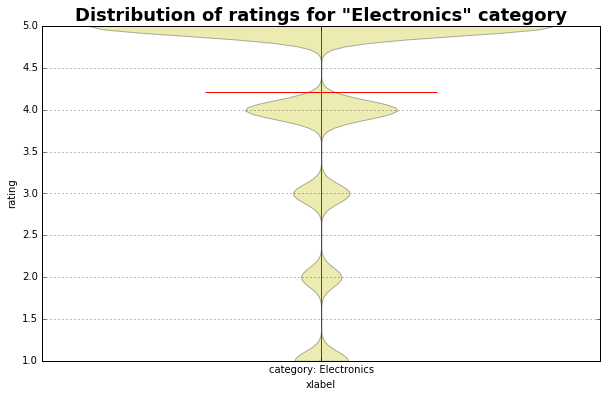

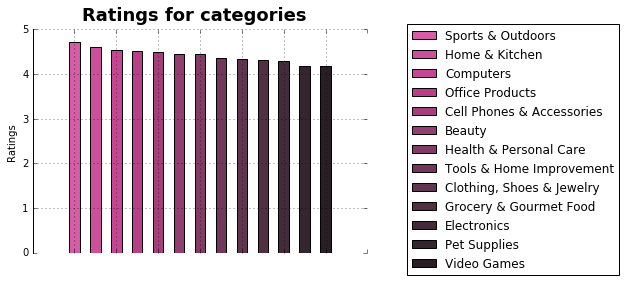

In [34]:
from IPython.html.widgets import interact, fixed
import numpy as np
import operator
from operator import itemgetter
#%matplotlib qt
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display
import colorsys
from bokeh.plotting import figure, show, output_notebook
from bokeh.charts import Bar, output_file, show
from bokeh.models import Legend

def plot_rir(DEAL_WITH_CATEGORIES = False,  
                                             category="Electronics",
                                            brands_within_category=False,
                                             change_of_ratings_over_time=False,
                                             compare_with_other_countries=False, 
                                            DEAL_WITH_BRANDS = False,  
                                             brand="Victorinox", show_best_and_worst_product=False,
                                             avg_price_over_time=False
                                            ): #s=None, length=30000, number=8, , 
    global all_data, france_means, italy_means, usa_means, germany_means, all_data_brand
    if DEAL_WITH_CATEGORIES == True and DEAL_WITH_BRANDS==False:
          
        if brands_within_category==False and change_of_ratings_over_time==False and compare_with_other_countries==False:
            fig, axes = plt.subplots(nrows=1, figsize=(10, 6))
            axes.violinplot(all_data[category], showmeans=True, showmedians=True)
            axes.set_title("Distribution of ratings for \""+category+"\" category", fontsize=18, fontweight='bold')
            # adding horizontal grid lines
            axes.yaxis.grid(True)
            axes.set_xlabel('xlabel')
            axes.set_ylabel('rating')
            # add x-tick labels
            plt.setp(axes, xticks=[1], xticklabels=["category: "+ category])
            plt.show()
            
        if brands_within_category==False and change_of_ratings_over_time==False and compare_with_other_countries==False:
            fig, ax = plt.subplots()
            colors = _get_colors(len(cat_means),0.9)
            for ind,x in enumerate(cat_means):
                ax.bar(range(ind,ind+1), cat_means[ind][1], color=colors[ind], align='center', width=0.5, label=cat_means[ind][0])
                ax.spines["top"].set_visible(False)
                ax.spines["right"].set_visible(False)
                ax.spines["bottom"].set_visible(False)
                ax.xaxis.set_major_formatter(plt.NullFormatter())
            #format the ticks
            ax.grid(True)
            plt.suptitle("Ratings for categories", fontsize=18, fontweight='bold') 
            plt.ylabel("Ratings") 
            plt.legend(loc='best', bbox_to_anchor=(1.1, 1.05))
            #plt.axis("off")
            plt.show()
            
        if brands_within_category == True and change_of_ratings_over_time==False and compare_with_other_countries==False:
            fig, ax = plt.subplots()
            colors = _get_colors(len(sorted_reviews[category]),0.5)
            for ind in range(len(sorted_reviews[category])):
                ax.bar(range(ind,ind+1), sorted_reviews[category][ind][1][0], color=colors[ind], align='center', \
                       width=0.5, label=sorted_reviews[category][ind][0])
                ax.spines["top"].set_visible(False)
                ax.spines["right"].set_visible(False)
                ax.spines["bottom"].set_visible(False)
                ax.xaxis.set_major_formatter(plt.NullFormatter())
            #format the ticks
            ax.grid(True)
            plt.suptitle("Ratings of Brands within\""+category+"\" category", fontsize=18, fontweight='bold') 
            plt.ylabel("Ratings") 
            plt.legend(loc='best', bbox_to_anchor=(1.1, 1.05))
            #plt.axis("off")
            plt.show()
            
        if change_of_ratings_over_time==True and compare_with_other_countries==False:
            hor_axis = []
            for index in eg[category].groupby(['reviewYear']).mean()['unixReviewTime'].index:
                Y = eg[category].groupby(['reviewYear']).mean()['unixReviewTime'].map(lambda t: datetime.fromtimestamp(t))[index].year
                dt = datetime(year=Y, month=1, day=1)
                new_year_day = time.mktime(dt.timetuple())
                hor_axis.append(datetime.fromtimestamp(new_year_day))
            plt.rcParams["figure.figsize"] = [8,3]
            years = mdates.YearLocator()   # every year
            months = mdates.MonthLocator()  # every month
            yearsFmt = mdates.DateFormatter('%Y')
            fig, ax = plt.subplots()
            ax.plot( eg[category].groupby(['reviewYear','reviewMonth']).mean()['unixReviewTime'].map
                     (lambda t: datetime.fromtimestamp(t)),
                     eg[category].groupby(['reviewYear','reviewMonth']).mean()['overall'],'y',label='Average Monthly Rating')
            ax.plot(hor_axis, eg[category].groupby(['reviewYear']).mean()['overall'],'ro-',label='Average Annual Rating')
            # format the ticks
            ax.xaxis.set_major_locator(years)
            ax.xaxis.set_major_formatter(yearsFmt)
            ax.xaxis.set_minor_locator(months)
            ax.grid(True)
            plt.title((category))
            plt.legend(loc='lower left')
            plt.show()
        
        if compare_with_other_countries==True: 
            countries_names=["Switzerland"]
            countries_means=[cat_means_countries[category]]
            if category in france_means:
                countries_names.append("France")
                countries_means.append(france_means[category])
            if category in italy_means:
                countries_names.append("Italy")
                countries_means.append(italy_means[category])
            if category in usa_means:
                countries_names.append("USA")
                countries_means.append(usa_means[category])
            if category in germany_means:
                countries_names.append("Germany")
                countries_means.append(germany_means[category])
            dictio = {'names':countries_names, 'values':countries_means}
            df = pd.DataFrame(dictio)
            p = Bar(df, 'names', values='values', title="Average Ratings of other Countries within \""+category+"\" category", \
                                                                legend='bottom_left')
            output_notebook()
            show(p)
                        
    if DEAL_WITH_BRANDS==True:
        if show_best_and_worst_product == False and avg_price_over_time==False:
            fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
            #axes[0].boxplot(all_data_brand[brand], showfliers=True)
            #axes[0].set_title('box plot')
            axes.violinplot(all_data_brand[brand], showmeans=True, showmedians=True)
            axes.set_title("Distribution of ratings for \""+brand+"\" brand", fontsize=18, fontweight='bold')
            # adding horizontal grid lines
            axes.yaxis.grid(True)
            #ax.set_xticks([y+1 for y in range(len(all_data_brand))])
            axes.set_xlabel('xlabel')
            axes.set_ylabel('rating')
            # add x-tick labels
            plt.setp(axes, xticks=[y+1 for y in range(1)], xticklabels=["brand: "+ brand])
            #plt.push()
        
            fig, ax = plt.subplots()
            colors = _get_colors(len(significant_brands),0.15)
            for ind,x in enumerate(significant_brands):
                ax.bar(range(ind,ind+1), bran_means[ind][1], color=colors[ind], align='center', \
                       width=0.5, label=bran_means[ind][0])
                ax.spines["top"].set_visible(False)
                ax.spines["right"].set_visible(False)
                ax.spines["bottom"].set_visible(False)
                ax.xaxis.set_major_formatter(plt.NullFormatter())
            #format the ticks
            ax.grid(True)
            plt.suptitle("Ratings of Brands with most Reviews", fontsize=18, fontweight='bold') 
            plt.ylabel("Ratings") 
            plt.legend(loc='best', bbox_to_anchor=(1.1, 1.05))
            #plt.axis("off")
            plt.show()
        
        url_b="pictures"+'/'+brand+'/best.jpg'
        url_w="pictures"+'/'+brand+'/worst.jpg'
            
        if show_best_and_worst_product == True and avg_price_over_time==False:
            i=Image(url_b, width=400,height=300)
            print("\033[4;32;48m" + "BEST RATED PRODUCT FROM " + brand+ " BRAND" + '\033[0m')
            display(i)
            pd.options.display.max_colwidth = 100
            title = str(data[data["asin"]==best[brand]]["title"].drop_duplicates())
            title=title[:title.find(",")]
            print(''.join([i for i in title if not i.isdigit()]))
            i=Image(url_w, width=400,height=300)
            print("\033[4;32;48m" + "\n\nWORST RATED PRODUCT FROM " + brand+ " BRAND")
            display(i)
            title=str(data[data["asin"]==worst[brand]]["title"].drop_duplicates())
            title = title[:title.find(",")]
            print(''.join([i for i in title if not i.isdigit()]))
        
        if avg_price_over_time==True:
            hor_axis = []
            for index in eg_brand[brand].groupby(['reviewYear']).mean()['unixReviewTime'].index:
                Y = eg_brand[brand].groupby(['reviewYear']).mean()['unixReviewTime'].map(lambda t: datetime.fromtimestamp(t))[index].year
                dt = datetime(year=Y, month=1, day=1)
                new_year_day = time.mktime(dt.timetuple())
                hor_axis.append(datetime.fromtimestamp(new_year_day))
            plt.rcParams["figure.figsize"] = [8,3]
            years = mdates.YearLocator()   # every year
            months = mdates.MonthLocator()  # every month
            yearsFmt = mdates.DateFormatter('%Y')
            fig, ax = plt.subplots()
            ax.plot( eg_brand[brand].groupby(['reviewYear','reviewMonth']).mean()['unixReviewTime'].map
                     (lambda t: datetime.fromtimestamp(t)),
                     eg_brand[brand].groupby(['reviewYear','reviewMonth']).mean()['price'],'y',label='Average Monthly Price')
            ax.plot(hor_axis, eg_brand[brand].groupby(['reviewYear']).mean()['price'],'ro-',label='Average Annual Price')
            # format the ticks
            ax.xaxis.set_major_locator(years)
            ax.xaxis.set_major_formatter(yearsFmt)
            ax.xaxis.set_minor_locator(months)
            ax.grid(True)
            plt.title((brand))
            plt.legend(loc='upper right')
            plt.show()
        
        #input("Press enter to exit ;)")
interact(plot_rir, category=significant_categories, brand=significant_brands) #plot_rir, s=fixed(rir), length=(500, 25000, 1000), number=(1,8),